In [1]:
import pandas as pd

In [3]:
#mac
#train = pd.read_csv('/Users/ousei/Documents/数据分析/Datawhale/data/train.csv')
#testA = pd.read_csv('/Users/ousei/Documents/数据分析/Datawhale/data/testA.csv')

#win
train = pd.read_csv('D:\DS\data\\train.csv')
testA = pd.read_csv('D:\DS\data\\testA.csv')

In [4]:
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)

Train data shape: (800000, 47)
TestA data shape: (200000, 46)


In [5]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [6]:
#分类指标评价计算示例
#混淆举证
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = [0,1,0,1]
y_true = [0,1,1,0]
print('混淆矩阵:\n',confusion_matrix(y_true,y_pred))

混淆矩阵:
 [[1 1]
 [1 1]]


In [9]:
# accuracy
from sklearn.metrics import accuracy_score
y_pred = [0,1,0,1]
y_true = [1,0,1,1]
print('acc:',accuracy_score(y_true,y_pred))

acc: 0.25


以一个二分类问题为例，样本有正负两个类别。
那么模型预测的结果和真实标签的组合就有4种：TP，FP，FN，TN，如下图所示。

TP实际为正样本你预测为正样本，FN实际为正样本你预测为负样本，
FP实际为负样本你预测为正样本，TN实际为负样本你预测为负样本。

首先我们来谈一个好理解的概念：Accuracy(准确率)

这个概念的理解就是你预测对的样本数占样本总数的比例，那什么是预测对的样本？什么是总样本？ 看上面的图，我们能知道预测正确的样本数是TP,TN；总体的样本数就是四个加起来：TP+FN+FP+TN。 所以根据定义，可以得到Acc的计算公式：

Accuracy=TP+TN/(TP+TN+FP+FN)

紧接着我们来看什么是Precision(精确率)
很多人容易把accuracy和precision弄混，无论是叫法还是定义。实际上很简单，区别也很明显。

精确率是针对我们预测结果而言的，它表示的是预测为正的样本中有多少是真正的正样本。那么预测为正就有两种可能了，一种就是把正类预测为正类(TP)，另一种就是把负类预测为正类(FP)

Precision=TP/(TP+FP)

随后是召回率(Recall)：

召回率是针对我们原来的样本而言的，它表示的是样本中的正例有多少被预测正确了。那也有两种可能，一种是把原来的正类预测成正类(TP)，另一种就是把原来的正类预测为负类(FN)。

Recall=TP/(TP+FN)

一般情况下，召回率和精确率是针对某一个类别说的，比如正类别的Recall，负类别的Recall等。如果你是10分类，那么可以有1这个类别的Precision，2这个类别的Precision，3这个类别的Recall等。而没有类似全部数据集的Recall或Precision这种说法。 通常对于二分类，我们说正类的recall和precision。

补充：
在信息检索领域，精确率和召回率又被称为查准率和查全率，

查准率＝检索出的相关信息量 / 检索出的信息总量
查全率＝检索出的相关信息量 / 系统中的相关信息总量

F1-score 是基于召回率和精确率计算的：

F1score=2∗Precision∗Recall/(Precision+Recall)

In [1]:
## Precision,Recall,F1-score
from sklearn import metrics
y_pred = [0,1,0,1]
y_true = [0,1,1,0]
print('Precision',metrics.precision_score(y_true,y_pred))
print('Recall',metrics.recall_score(y_true,y_pred))
print('F1-score:',metrics.f1_score(y_true,y_pred))

Precision 0.5
Recall 0.5
F1-score: 0.5


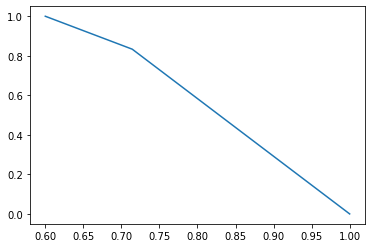

In [4]:
## P-R曲线
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]

precision,recall,thresholds = precision_recall_curve(y_true,y_pred)
plt.plot(precision,recall)

Text(0.5, 0, 'FPR')

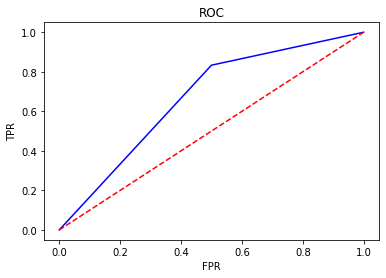

In [5]:
## ROC曲线
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
FPR,TPR,thressholds = roc_curve(y_true,y_pred)
plt.title('ROC')
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [6]:
#AUC
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0,0,1,1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:',roc_auc_score(y_true, y_scores))

AUC socre: 0.75


In [7]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
FPR,TPR,thresholds = roc_curve(y_true,y_pred)
KS = abs(FPR-TPR).max()
print('KS:',KS)

KS: 0.5238095238095237
